In [198]:
import matplotlib.pyplot as plt
import pickle

In [199]:
with open(f"results/supervised_results.pkl", "rb") as f:
    supervised_results = pickle.load(f)

In [200]:
supervised_results

{'swinir': 37.19228571639584,
 'unet_1': 31.282000305822432,
 'swinir_probe': 36.57495340542814,
 'swinir_probeft_final': 36.662609523907214,
 'unet_0.1': 7.250976734120336,
 'unet_0.2': 8.333488411098351,
 'unet_0.3': 18.39647178999607,
 'unet_0.4': 16.82477390932551,
 'unet_0.5': 28.844216051552934,
 'unet_0.6': 30.1237187624117,
 'unet_0.7': 24.188026660707955,
 'unet_0.8': 30.991315676715317,
 'unet_0.9': 29.155623941775346}

In [201]:
#adding INR results, as was not apart of the supervised scripts
supervised_results["inr"] = 36.71

In [202]:
#only plotting fully trained models
supervised_params = {key:0 for key in supervised_results.keys() if "." not in key}

In [203]:
#number of model params
supervised_params["swinir"] = 11497681
supervised_params["swinir_probe"] = 11497681
supervised_params["swinir_probeft_final"] = 11497681
supervised_params["unet_1"] = 2396455
supervised_params["inr"] = 309441


In [204]:
supervised_params

{'swinir': 11497681,
 'unet_1': 2396455,
 'swinir_probe': 11497681,
 'swinir_probeft_final': 11497681,
 'inr': 309441}

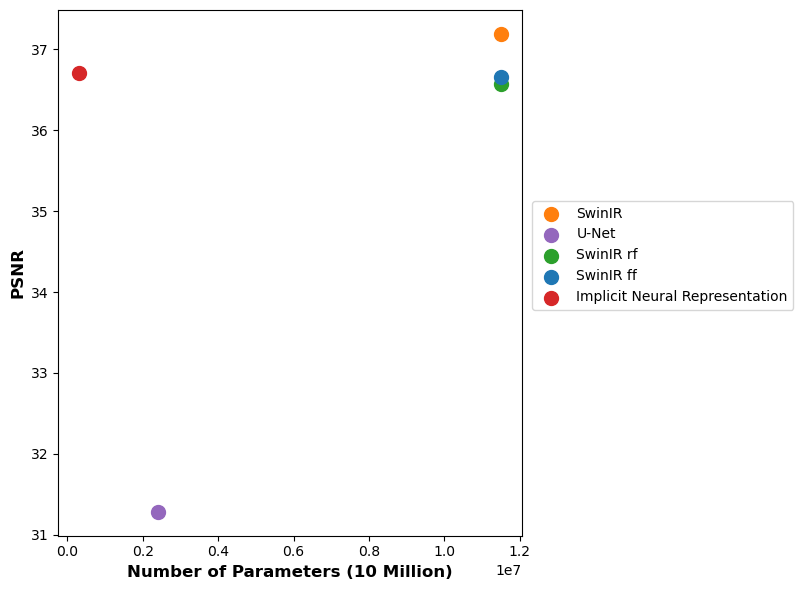

In [205]:
# Rename mapping
label_rename_map = {
    "swinir": "SwinIR",
    "swinir_probe": "SwinIR rf",
    "swinir_probeft_final": "SwinIR ff",
    "unet_1": "U-Net",
    "inr": "Implicit Neural Representation"

}

# Prepare data with renamed labels
fig_1_data = [
    (supervised_params[k], supervised_results[k], label_rename_map.get(k, k))
    for k in supervised_params.keys()
    if k in supervised_results
]

# Unique labels and colors
labels = [i[2] for i in fig_1_data]
unique_labels = list(set(labels))
colors = plt.cm.tab10(range(len(unique_labels)))
label_color_map = {label: colors[i] for i, label in enumerate(unique_labels)}

# Plot
plt.figure(figsize=(10, 6))
for param, score, label in fig_1_data:
    plt.scatter(param, score, color=label_color_map[label], label=label, s=100)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.6, 0.65))
plt.ylabel("PSNR", fontweight='bold', fontsize= 12)
plt.xlabel("Number of Parameters (10 Million)", fontweight='bold', fontsize= 12)
plt.tight_layout()
plt.show()



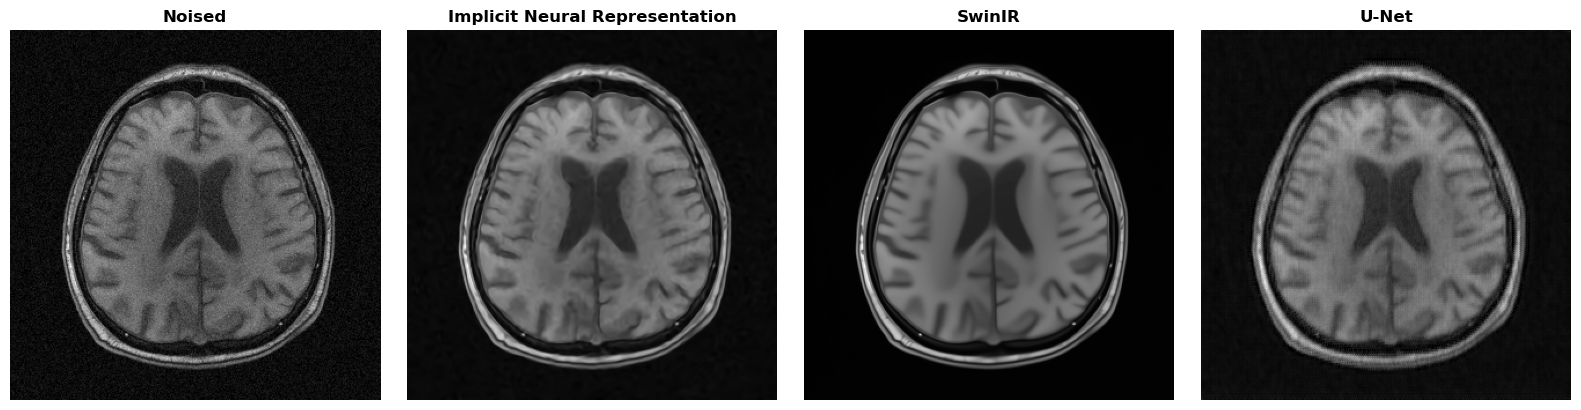

In [206]:
import matplotlib.pyplot as plt
from PIL import Image

# Define image paths and captions
base_path = "/Users/bhavverma/Documents/coursework/mbp_ai/results/outputs/"
image_files = [
    "test_8_noise.png",
    "test_8_inr.png",
    "test_8_swinir.png",
    "test_8_unet_1.png"
]
captions = ["Noised", "Implicit Neural Representation", "SwinIR", "U-Net"]

# Load images
images = [Image.open(base_path + fname) for fname in image_files]

# Plot images
plt.figure(figsize=(20, 4))
for i, (img, caption) in enumerate(zip(images, captions)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap = "gray")
    plt.title(caption, fontweight = "bold")
    plt.axis('off')

plt.tight_layout()
plt.show()


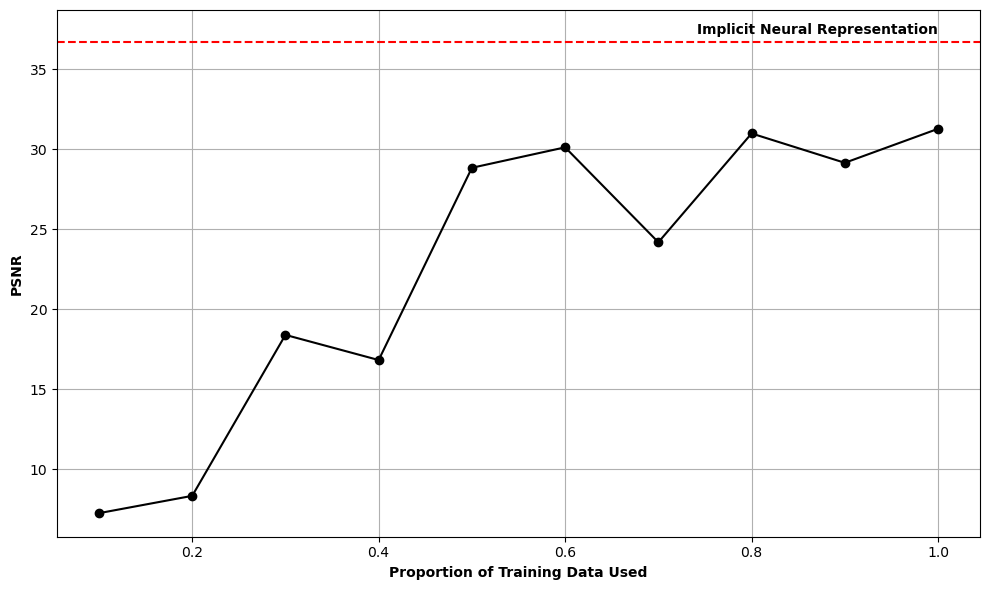

In [207]:
unet_only_performance = {i: supervised_results[i] for i in supervised_results if "unet" in i}

sorted_items = sorted(unet_only_performance .items(), key=lambda item: float(item[0].split('_')[1]))
x_vals = [float(k.split('_')[1]) for k, _ in sorted_items]
y_vals = [v for _, v in sorted_items]

# Extend y-axis limit so the label is visible within the plot area
y_max = max(max(y_vals), supervised_results["inr"]) + 2  # Add padding for label visibility

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color = "black")
plt.axhline(y=supervised_results["inr"], color='red', linestyle='dashed')
plt.text(x=max(x_vals), y=supervised_results["inr"]+ 0.5, s='Implicit Neural Representation', color='black', fontweight="bold", ha='right')
plt.ylim(top=y_max)
plt.xlabel("Proportion of Training Data Used", fontweight = "bold")
plt.ylabel("PSNR", fontweight = "bold")
plt.grid(True)
plt.tight_layout()
plt.show()

